In [121]:
# 1)    import modules and packages

import requests #get url
from bs4 import BeautifulSoup #parse
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [302]:
# 2)  create url and scrape single game shots

base_url = "https://understat.com/match/"
match_id =  str(input('Enter Match ID:'))
url = base_url + match_id

In [312]:
# 3)    Use request and BrautifulSoup to scrape and parse data

res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml') #inspect page - sources - look at the html and select the scripts with variable you want to parse next
scripts = soup.find_all('script') # find all the scripts in the page

In [313]:
#   get shots data only

strings = scripts[1].string # her script tag list bir list item, ShotsData bu element listteki ikinci eleman then convert into string

#   strip the unnecessary bits

index_start = strings.index("('")+2 # start stripping 2 digits after the first (' encountered
index_end = strings.index("')") # end stripping after the ') sequence is encountered

json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

#   convert strings to json format

data = json.loads(json_data)
#data

In [314]:
# 4)    convert to JSON and a df using pandas

team = []
minute = []
x = []
y = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []


In [315]:
#home team data

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'X':
            x.append(data_home[index][key])
        if key == 'Y':
            y.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'h_a':
            hora.append(data_home[index][key])

# create the dataframe

col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df_home = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df_home = df_home.T # transpose

df_home['xG'] = pd.to_numeric(df_home['xG']) #convert xG into numeric for bubble size

df_home.loc[df_home['hora'] == 'h', 'hora'] = 0 # if home rep w/ zero
df_home.loc[df_home['hora'] == 'a', 'hora'] = 1 # if away rep with one

In [316]:
col_names = [ 'minute', 'xG']
df_zero = pd.DataFrame([0,0], index = col_names)
df_zero = df_zero.T

In [317]:
# Home xG chart
minute = [int(i) for i in minute]

xG = [float(i) for i in xG]
xG = np.cumsum(xG)

xG_home_max = max(xG)
col_names = [ 'minute', 'xG']
df_home_max = pd.DataFrame([100,xG_home_max], index = col_names)
df_home_max = df_home_max.T

col_names = [ 'minute', 'xG']
xG_home = pd.DataFrame([minute,xG], index = col_names)
xG_home = xG_home.T # transpose
xG_home = df_zero.append(xG_home)
xG_home = xG_home.append(df_home_max)
xG_home

,minute,xG
0,0.0,0.000000
0,8.0,0.684540
1,35.0,1.082474
2,38.0,1.180499
3,47.0,1.253098
4,57.0,1.338741
5,59.0,1.381949
6,65.0,1.420537
0,100.0,1.420537


In [321]:
#reset lists

team = []
minute = []
x = []
y = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []

In [322]:
#away team data

for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'X':
            x.append(data_away[index][key])
        if key == 'Y':
            y.append(data_away[index][key])
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'h_a':
            hora.append(data_away[index][key])

            # create the dataframe

col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df_away = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df_away = df_away.T # transpose

df_away['xG'] = pd.to_numeric(df_away['xG']) #convert xG into numeric for bubble size

df_away.loc[df_away['hora'] == 'h', 'hora'] = 0 # if home rep w/ zero
df_away.loc[df_away['hora'] == 'a', 'hora'] = 1 # if away rep with one

In [323]:
# Away xG chart

minute = [int(i) for i in minute]

xG = [float(i) for i in xG]
xG = np.cumsum(xG)

xG_away_max = max(xG)
col_names = [ 'minute', 'xG']
df_away_max = pd.DataFrame([100,xG_away_max], index = col_names)
df_away_max = df_away_max.T

col_names = [ 'minute', 'xG']
xG_away = pd.DataFrame([minute,xG], index = col_names)
xG_away = xG_away.T # transpose
xG_away = df_zero.append(xG_away)
xG_away = xG_away.append(df_away_max)
xG_away

,minute,xG
0,0.0,0.000000
0,17.0,0.013800
1,61.0,0.033974
2,71.0,0.071225
3,75.0,0.088642
4,83.0,0.153629
5,89.0,0.222662
6,89.0,0.244191
7,89.0,0.631170
8,94.0,0.701700


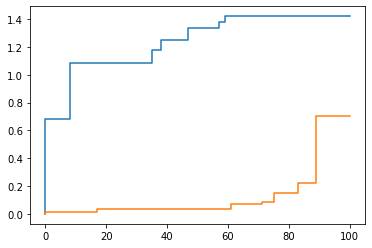

In [338]:

#def plot(a):
   #ax = a.plot('minute', 'xG', title  = 'xG', fontsize =2, drawstyle='steps-pre')
    #ax = plt.step(minute, xG) - gerek kalmadı
    #ax.set_xlabel('Minute')
    #ax.set_ylabel('xG')
    #ax.set_xlim(0,100)

plt.plot(xG_home.minute,xG_home.xG, drawstyle='steps-pre')
plt.plot(xG_away.minute,xG_away.xG, drawstyle='steps-pre')
plt.show()
